In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import IPython.display
from IPython.display import display
plt.style.use('seaborn')
import librosa
import librosa.display as ld
from IPython.display import Audio
from IPython.display import HTML

In [2]:
plt.rcParams.update({'font.size':16})

In [3]:
Audio(filename='DerezzedShort5.wav')

In [4]:
data, fs = librosa.load('DerezzedShort5.wav', sr=None)

In [6]:
data

array([ 0.05563354,  0.04571533,  0.03263855, ..., -0.1229248 ,
       -0.12051392, -0.12216187], dtype=float32)

### sampling rate: fs

In [5]:
fs

44100

### the blocklength BL:

The selected number of samples. This is always an integer power to the base 2 in the FFT (e.g., 2^10 = 1024 samples)

In [9]:
BL = 2**11
BL

2048

### Nyquist frequency: 
Indicates the theoretical maximum frequency that can be determined by the FFT.

In [11]:
fn = fs/2
fn

22050.0

### Measurement duration D:
(em segundos)

In [12]:
D = BL/fs
D

0.046439909297052155

### Frequency resolution df:
Indicates the frequency spacing between two measurement results.
(Hz)

In [14]:
df = fs / BL
df

21.533203125

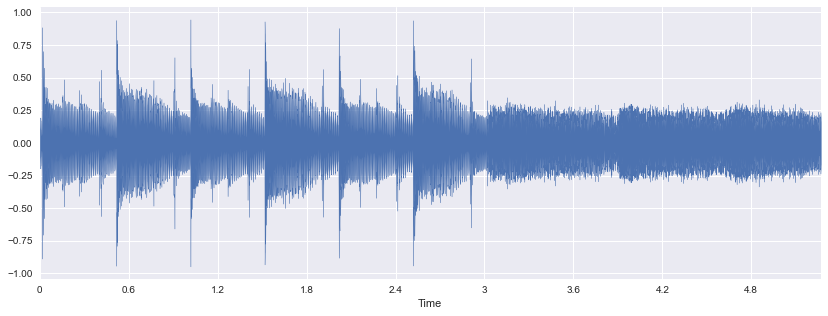

In [15]:
plt.figure(figsize=(14,5))
ld.waveplot(data, sr=fs)

# FFT

In [17]:
import scipy.io.wavfile as wavfile
import scipy
from scipy.fft import fft

In [18]:
FFT = fft.fft(data)
FFT

array([48.310272 -0.j      , 53.901447+29.659279j, 60.181557-29.36278j ,
       ..., -4.755128 -5.619309j, 60.181557+29.36278j ,
       53.901447-29.659279j], dtype=complex64)

In [19]:
tam = len(FFT)
fft_samples = fft.fftfreq(tam, 1.0/fs) #= Discrete Fourier Transform sample frequencies.
fft_samples

array([ 0.        ,  0.18971985,  0.3794397 , ..., -0.56915955,
       -0.3794397 , -0.18971985])

In [20]:
modulo = np.abs(FFT) #pegando os valores absolutos apenas
#modulo[1:100]

In [10]:
#modulo_novo = np.reshape(modulo,(1,tam))

C:\Users\Dani\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


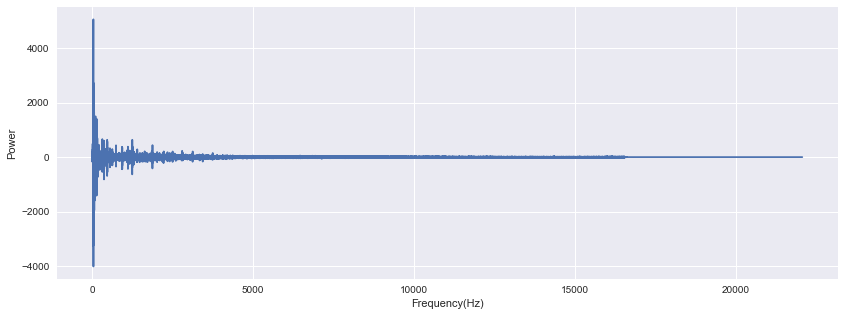

In [22]:
plt.figure(figsize=(14,5)) 
plt.plot(fft_samples[range(len(FFT)//2)], FFT[range(len(FFT)//2)])
plt.xlabel('Frequency(Hz)')
plt.ylabel('Power')
plt.show()

## Tentativa de histograma animado:

## Filtros passa-banda:

Order of the Filter= 45
Cut-off frequency= [0.40320515 0.62207105] rad/s 


C:\Users\Dani\anaconda3\lib\site-packages\scipy\signal\filter_design.py:1630: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


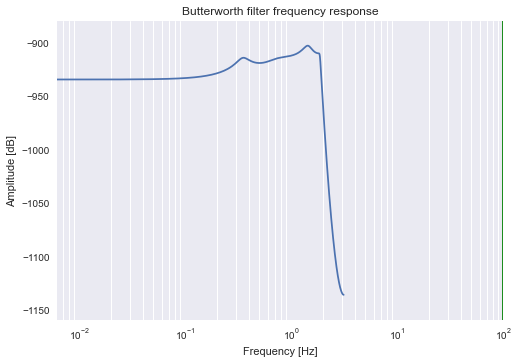

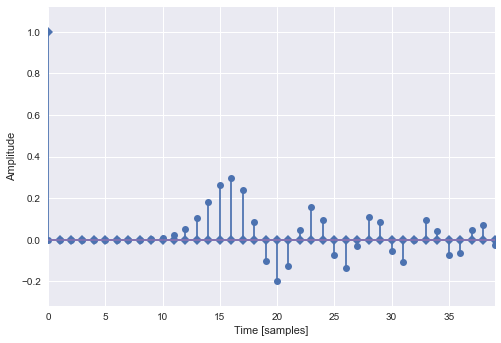

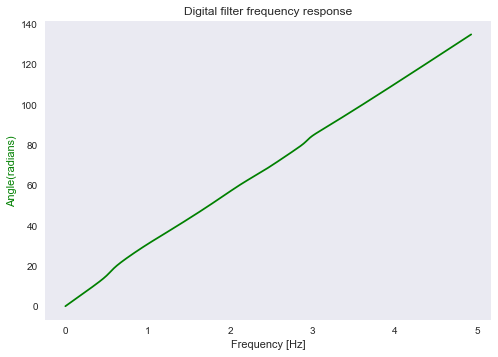

In [19]:
# User-defined function to convert the 
# values of edge frequencies
def convertX(f_sample,f):
  w=[]
    
  for i in range(len(f)):
    b=2*((f[i]/2)/(f_sample/2))
    w.append(b)
  
  omega_mine=[]
  
  for i in range(len(w)):
    c=(2/Td)*np.tan(w[i]/2)
    omega_mine.append(c)
  
  return omega_mine
  
# Importing Libraries
from scipy import signal
import math
   
# Specifications of Filter 
# sampling frequency 
f_sample = 10000
    
# pass band frequency 
f_pass =[2000,3000] 
    
# stop band frequency 
f_stop =[1900,3100]  
    
# pass band ripple 
fs = 0.5
    
# Sampling Time 
Td = 1  
    
 # pass band ripple 
g_pass = 0.4 
    
# stop band attenuation 
g_stop = 50  
  
# Conversion to prewrapped analog
# frequency 
omega_p=convertX(f_sample,f_pass)
omega_s=convertX(f_sample,f_stop)
    
# Design of Filter using signal.buttord 
# function 
N, Wn = signal.buttord(omega_p, omega_s, g_pass, g_stop, analog=True) 
    
# Printing the values of order & cut-off frequency
# N is the order 
print("Order of the Filter=", N)  
# Wn is the cut-off freq of the filter 
print("Cut-off frequency= {:} rad/s ".format(Wn)) 
    
# Conversion in Z-domain 
    
# b is the numerator of the filter & a is 
# the denominator 
b, a = signal.butter(N, Wn, 'bandpass', True) 
z, p = signal.bilinear(b, a, fs) 
  
# w is the freq in z-domain & h is the magnitude
# in z-domain 
w, h = signal.freqz(z, p, 512)
  
# Magnitude Response
plt.semilogx(w, 20*np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green')
plt.show()
  
# Impulse Response
imp = signal.unit_impulse(40)
c, d = signal.butter(N, 0.5)
response = signal.lfilter(c, d, imp)
plt.stem(np.arange(0, 40),imp,markerfmt='D',use_line_collection=True)
plt.stem(np.arange(0,40), response,use_line_collection=True)
plt.margins(0, 0.1)
plt.xlabel('Time [samples]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
  
# Frequency Response
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.set_ylabel('Angle(radians)', color='g')
ax1.set_xlabel('Frequency [Hz]')
angles = np.unwrap(np.angle(h))
ax1.plot(w/2*np.pi, angles, 'g')
ax1.grid()
ax1.axis('tight')
plt.show()

Order of the Filter= 41
Cut-off frequency= [0.90932652 1.29227868] rad/s 


C:\Users\Dani\anaconda3\lib\site-packages\scipy\signal\filter_design.py:1630: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


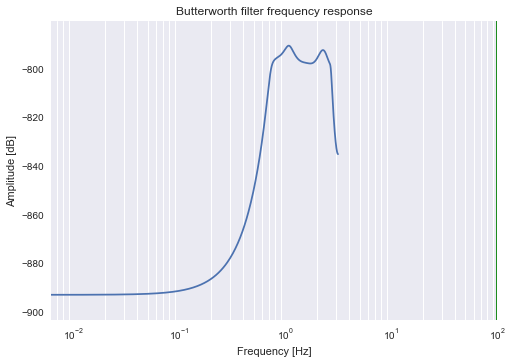

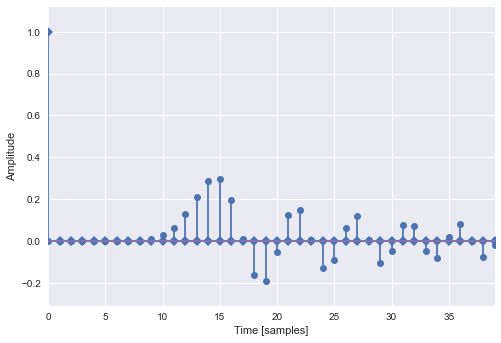

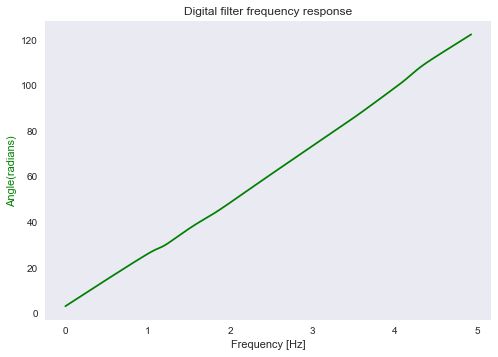

In [17]:
# sampling frequency 
f_sample2 =7000
    
# pass band frequency 
f_pass2 =[3000,4000] 
    
# stop band frequency 
f_stop2 =[2900,4100]  
    
# pass band ripple 
fs2 = 0.5
    
# Sampling Time 
Td2 = 1  
    
 # pass band ripple 
g_pass2 = 0.4 
    
# stop band attenuation 
g_stop2 = 50  
  
# Conversion to prewrapped analog
# frequency 
omega_p=convertX(f_sample2,f_pass2)
omega_s=convertX(f_sample2,f_stop2)
    
# Design of Filter using signal.buttord 
# function 
N2, Wn2 = signal.buttord(omega_p, omega_s, g_pass2, g_stop2, analog=True) 
    
# Printing the values of order & cut-off frequency
# N is the order 
print("Order of the Filter=", N2)  
# Wn is the cut-off freq of the filter 
print("Cut-off frequency= {:} rad/s ".format(Wn2)) 
    
# Conversion in Z-domain 
    
# b is the numerator of the filter & a is 
# the denominator 
b2, a2 = signal.butter(N2, Wn2, 'bandpass', True) 
z2, p2 = signal.bilinear(b2, a2, fs2) 
  
# w is the freq in z-domain & h is the magnitude
# in z-domain 
w2, h2 = signal.freqz(z2, p2, 512)
  
# Magnitude Response
plt.semilogx(w2, 20*np.log10(abs(h2)))
plt.xscale('log')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green')
plt.show()
  
# Impulse Response
imp2 = signal.unit_impulse(40)
c2, d2 = signal.butter(N2, 0.5)
response = signal.lfilter(c2, d2, imp2)
plt.stem(np.arange(0, 40),imp,markerfmt='D',use_line_collection=True)
plt.stem(np.arange(0,40), response,use_line_collection=True)
plt.margins(0, 0.1)
plt.xlabel('Time [samples]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
  
# Frequency Response
fig2, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.set_ylabel('Angle(radians)', color='g')
ax1.set_xlabel('Frequency [Hz]')
angles = np.unwrap(np.angle(h2))
ax1.plot(w/2*np.pi, angles, 'g')
ax1.grid()
ax1.axis('tight')
plt.show()